
# KKT Conditions

The KKT conditions are from Lagrangian multipler and are significant for SVM and SMO. The KKT conditions for the QP problem are particularly simple. The QP problem is solved when, for all $i$:

$$\begin{array}{mm}
a_i = 0 & \Leftrightarrow & t_i y_i \geqslant 1\\
0<a_i<C & \Leftrightarrow & t_i y_i = 1\\
a_i = C & \Leftrightarrow & t_i y_i \leqslant 1
\end{array}$$

where

- Points with $a_i = 0$ are correctly classified and lie outside the margin.
- Points with $0<a_i<C$ are at the edge of the margin and support the margin.
- Points with $a_i = C$ can be either correctly classified and lie inside the margin, or misclassified.

---------------

# SMO

Sequential Minimal Optimization (SMO) is a simple algorithm that can quickly solve the SVM QP (quadratic programming) problem without any extra matrix storage and without using numerical QP optimization steps at all. <font color='red'>SMO decomposes the overall QP problem into QP sub-problems</font>, using Osuna's theorem to ensure convergence.


## Smallest SVM QP problem

SMO chooses to solve the smallest possible optimization problem at every step. For the standard SVM QP problem, <font color='red'>the smallest possible optimization problem involves two Lagrangian multipliers, because the Lagrangian multipliers must obey a linear equality constraint.</font>

$$\sum_{n=1}^N a_nt_n = 0$$

It is nonsense to choose only one Lagrangian multiplier for optimization, because if so, $a_n$ has to be fixed for suiting the linear equality constraint such that we cannot optimize the Lagrangian multiplier $a_n$. Hence, at every step, SMO chooses two Lagrangian multipliers to jointly optimize.

$$a_1 + sa_2 = -t_1 \sum_{n\neq 1,2}^N a_n t_n=w\qquad \text{where}\quad s=t_1t_2=\pm 1$$

where the sumation of $a_1+sa_2$ is fixed. And the optimized Lagrangian multipliers $a_1^{new}$ and $a_2^{new}$ has to be subject to the same constraint

$$a_1^{new} + sa_2^{new} = a_1 + sa_2 = w$$

in order to keep meeting the linear equality constraint.


## Ranges of $a_1$ and $a_2$

There are two constriants on $a_1$ and $a_2$:

$$\begin{array}{ll}
\text{KKT condition}&0\leqslant a_n \leqslant C\qquad \text{where}\quad n=1,\cdots,N\\
\text{linear equality constraint} &a_1 + sa_2 = w
\end{array}$$

The KKT condition requires the point $(a_2, a_1)$ to lie in the square with length $C$. And the linear equality constraint requires the point $(a_2, a_1)$ lie on the line that is denoted by $a_1 + sa_2 = w$.

### Range of $a_2$

$$\left.\begin{array}{ll}
\text{KKT condition of }a_1 &0\leqslant a_1 \leqslant C\\
\text{linear equality constraint} &a_2 = sw - sa_1
\end{array}\right\}
\Rightarrow 
a_2 \in
\left\{\begin{array}{ll}
[-w, -w+C] & \text{if} & s=-1\\
[w-C, w] & \text{if} & s=1
\end{array}\right.$$

And $a_2$ must also be in the range $[0, C]$, hence

$$a_2 \in [L, H]\qquad \text{where}\quad
\left\{\begin{array}{ll}
L=max(0, -w) & H=min(C, -w+C) & \text{if} & s=-1\\
L=max(0, w-C) &H=min(C, w) & \text{if} & s=1
\end{array}\right.$$

After adjustment, we obtain

$$\bbox[#e0f0ff]{\begin{array}{ll}
\text{if} & s=-1: &L=max(0, a_2-a_1) & H=min(C, C+a_2-a_1) \\
\text{if} & s=1: &L=max(0, a_2+a_1-C) &H=min(C, a_2+a_1) 
\end{array}}$$

### Range of $a_1$

We shall use the linear equation $a_1 + sa_2 = w$ to evaluate the value of $a_1$. As long as $a_2\in [L, H]$, the $a_1$ that derives from $a_2$ will also satisfy the KKT condition and linear equality constraint.


*If $L\geqslant H$, we cannot take the subsequent steps to optimize the pair of $a_1$ and $a_2$.*


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

REC_LINES = np.array([[0, 1, 1, 0, 0], [0, 0, 1, 1, 0]])
SLANT_LINE_X = np.array([-2, 2])

def hide_axes(ax):
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_color("none")
    ax.spines["left"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.set_xlim(-.2, 1.2)
    ax.set_ylim(-.2, 1.2)
    
def draw_rec(ax):
    hide_axes(ax)
    ax.plot(REC_LINES[0], REC_LINES[1])
    ax.set_xticks([])
    ax.set_yticks([])

def draw_line(ax, sign, k):
    x = SLANT_LINE_X
    y = k - sign*x
    ax.plot(x, y)
    
def draw_range(ax, xstart, xend, y):
    ax.annotate(
        '', xy=(xstart, y), xycoords='data',
        xytext=(xend, y), textcoords='data',
        arrowprops={'arrowstyle': '<->', 'color':'r'})
    ax.text(xstart+(xend-xstart-.3)/2, y-.1, r"Range of $a_2$", fontsize=14, color='r')

def main():
    fig=plt.figure(figsize=(12,12), dpi=50)
    (ax1,ax2),(ax3,ax4) = fig.subplots(2, 2)
    draw_rec(ax1)
    draw_rec(ax2)
    draw_rec(ax3)
    draw_rec(ax4)
    
    ax1.set_xticks([0, 1])
    ax1.set_yticks([0, 1])
    ax1.set_xticklabels([r"$a_2 = 0$", r"$a_2 = C$"], fontsize=15)
    ax1.set_yticklabels([r"$a_1 = 0$", r"$a_1 = C$"], fontsize=15)
    
    K = np.array([-.3, .3, 1.2, .4])
    S = np.array([-1, -1, 1, 1])
    draw_line(ax1, S[0], K[0])
    draw_line(ax2, S[1], K[1])
    draw_line(ax3, S[2], K[2])
    draw_line(ax4, S[3], K[3])
    
    i = 0
    for ax in [ax1, ax2, ax3, ax4]:
        x0 = S[i]*K[i] - S[i]*0
        xc = S[i]*K[i] - S[i]*1
        # print(x0, xc)
        l = min(x0, xc)
        h = max(x0, xc)
        L = max(0, l)
        H = min(1, h)
        draw_range(ax, L, H, -.05)
        i+=1
    
    plt.show()
    return

if __name__=="__main__":
    main()



## Determine $a_2$

Firstly, we shall extract the terms that related to $a_1$ and $a_2$ from the objective function.

$$\begin{align*}
\Psi& = \frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_n a_m t_n t_m k(\mathbf{x}_n, \mathbf{x}_m) - \sum_{n=1}^N a_n\\
&=\underbrace{\frac{1}{2}a_1 a_1 t_1 t_1 k_{11} + \frac{1}{2}a_2 a_2 t_2 t_2 k_{22} + a_1 a_2 t_1 t_2 k_{12} + a_1t_1\sum_{n\neq 1,2}^N a_n t_n k_{1n} + a_2t_2\sum_{n\neq 1,2}^N a_n t_n k_{2n} - a_1 - a_2}_{a_1,a_2 \text{ related entries}\qquad \text{where }k_{ij}=k(\mathbf{x}_i,\mathbf{x}_j)} + constant\\
&=\underbrace{\frac{1}{2}a_1^2 k_{11} + \frac{1}{2}a_2^2 k_{22} + s a_1 a_2 k_{12} + a_1 t_1 v_1 + a_2 t_2 v_2 - a_1 - a_2}_{\text{where }t_{i}^2=1\quad t_i t_j=s=\pm 1\quad v_i=\sum_{n\neq 1,2}^N a_n t_n k_{in}} + constant\\
&=\underbrace{\frac{1}{2}(w-sa_2)^2k_{11} + \frac{1}{2}a_2^2k_{22} + s(w-sa_2)a_2k_{12} + (w-sa_2)t_1 v_1 + a_2 t_2 v_2 - (w-sa_2) - a_2}_{\sum_n^N a_n t_n=0\quad\Rightarrow\quad a_1 + sa_2 = -\sum_{n\neq 1,2}^N a_n t_n=w} + constant\\
\end{align*}$$

which is a quadratic function over $a_2$, and $a_1$ has been transfered to the form denoted by $a_2$ due to the constraint that <font color='red'>the sumation of $a_1$ and $sa_2$ is fixed</font>. As a result, we can make use of the Newton method which is given by a closed form to obtain the optimum of $a_2$.

$$a_2^{new} = a_2 - (\frac{d^2 \Psi}{d a_2^2})^{-1}\frac{d\Psi}{da_2}$$

where the first derivative of $\Psi$ with respect to $a_2$ is given by

$$\frac{d\Psi}{da_2} = -sk_{11}(w-sa_2) + k_{22}a_2 - k_{12}a_2 + sk_{12}(w-sa_2) - st_1 v_1 + t_2 v_2 + s - 1$$

the second derivative of $\Psi$ with respect to $a_2$ is given by

$$\frac{d^2\Psi}{da_2^2} = k_{11} + k_{22} - k_{12} - k_{12}$$

### Positive second derivative

Note that only if the second derivative is possitive, which is the usual case, we can get the correct $a_2$, because we have assumed that this is a positive quadratic function and we are looking for the minimum of $a_2$.

With these conditions, we can evaluate the new value which is the minimum of $a_2$.

$$\begin{align*}
a_2^{new} &= a_2 - \frac{ -sk_{11}(w-sa_2) + k_{22}a_2 - k_{12}a_2 + sk_{12}(w-sa_2) - st_1 v_1 + t_2 v_2 + s - 1}{\eta}\qquad\text{let }\bbox[#e0f0ff]{\eta=k_{11} + k_{22} - 2k_{12}}\\
&= a_2 -\frac{-t_1 t_2 k_{11}a_1 + t_2t_2k_{22}a_2 - t_2t_2k_{12}a_2 + t_1t_2k_{12}a_1 - t_1t_2t_1 v_1 + t_2 v_2 + t_1t_2 - t_2t_2}{\eta}\\
&= a_2 -t_2\frac{-t_1 k_{11}a_1 + t_2k_{22}a_2 - t_2k_{12}a_2 + t_1k_{12}a_1 - v_1 +  v_2 + t_1 - t_2}{\eta}\\
&= a_2 -t_2\frac{-\big(t_1 k_{11}a_1 + t_2k_{12}a_2 + v_1 - t_1\big) + \big(t_2k_{22}a_2  + t_1k_{12}a_1 +  v_2 - t_2\big)}{\eta}\\
&= a_2 -t_2\frac{-\big(\sum_{n=1}^N t_na_nk_{1n}-t_1\big) + \big(\sum_{n=1}^N t_na_nk_{2n}-t_2\big)}{\eta}\\
&= a_2 + t_2\frac{\big(\sum_{n=1}^N t_na_nk_{1n} + b - t_1\big) - \big(\sum_{n=1}^N t_na_nk_{2n} + b - t_2\big)}{\eta}\\
&= a_2 + t_2\frac{\big(\sum_{n=1}^N t_na_n\phi(\mathbf{x}_n)\phi(\mathbf{x}_1) + b - t_1\big) - \big(\sum_{n=1}^N t_na_n\phi(\mathbf{x}_n)\phi(\mathbf{x}_2) + b - t_2\big)}{\eta}\\
&= a_2 + t_2\frac{\big(\mathbf{w}^T\phi(\mathbf{x}_1) + b - t_1\big) - \big(\mathbf{w}^T\phi(\mathbf{x}_2) + b - t_2\big)}{\eta}\\
&= a_2 + t_2\frac{\big(y_1 - t_1\big) - \big(y_2 - t_2\big)}{\eta}\\
&= \bbox[#e0f0ff]{a_2 + t_2\frac{E_1-E_2}{\eta}\qquad \text{let } E_1 = y_1-t_1\quad E_2 = y_2-t_2}
\end{align*}$$

The obtained $a_2$ is then clipped by the constraints $L$ and $H$.

$$\bbox[#e0f0ff]{
a_2^{new} = \left\{\begin{array}{ll}
H &if &a_2^{new} \geqslant H\\
a_2^{new} &if & L<a_2^{new}<H\\
L &if &a_2^{new} \leqslant L
\end{array}\right.}$$



### Non-positive second derivative

In any event, SMO will work even when $\eta$ is not positive, in which case the objective function $\Psi$ should be evaluate at each end of the line segment, namely $a_2=L$ and $a_2=H$.

We have got the expression of the objective function $L$ above

$$\Psi = \frac{1}{2}a_1^2k_{11} + \frac{1}{2}a_2^2k_{22} + sa_1a_2k_{12} + a_1t_1 v_1 + a_2 t_2 v_2 - a_1 - a_2 \underbrace{ + constant}_{\text{useless while comparing}}$$

where 'constant' is irrelavent to the variables $a_1$ and $a_2$. And because we are going to evaluate $\Psi_{L}$ and $\Psi_H$ for comparision, these terms can be omitted.

Now consider that we are going to assign a new value $A_2$ to $a_2$, then the objective function will take the form

$$\begin{align*}
\Psi(A_2) &= \frac{1}{2}(a_1^{new})^2k_{11} + \frac{1}{2}(a_2^{new})^2k_{22} + sa_1^{new}a_2^{new}k_{12} + a_1^{new}t_1 v_1 + a_2^{new} t_2 v_2 - a_1^{new} - a_2^{new}\\
&= \underbrace{\frac{1}{2}A_1^2 k_{11} + \frac{1}{2}A_2^2 k_{22} + sA_1A_2k_{12} + A_1 t_1v_1 + A_2 t_2v_2 - A_1 - A_2}_{\text{where }A_1 = a_1+s(a_2-A_2)\quad \text{Because }A_1+sA_2=a_1+sa_2}\\
&= \frac{1}{2}A_1^2 k_{11} + \frac{1}{2}A_2^2 k_{22} + sA_1A_2k_{12} + A_1 t_1(v_1-t_1) + A_2 t_2(v_2-t_2)\\
&= \underbrace{\frac{1}{2}A_1^2 k_{11} + \frac{1}{2}A_2^2 k_{22} + sA_1A_2k_{12} + t_1\big(\mathbf{w}^T\phi(\mathbf{x}_1)-a_1t_1k_{11}-a_2t_2k_{12} - t_1\big)A_1 + t_2\big(\mathbf{w}^T\phi(\mathbf{x}_2)-a_1t_1k_{12}-a_2t_2k_{22} - t_2\big)A_2}_{\text{where}\quad v_i=\sum_{n\neq 1,2}^N a_nt_nk_{ni}=\sum_{n=1}^N a_nt_nk_{ni}-a_1t_1k_{1i}-a_2t_2k_{2i}=\mathbf{w}^T\phi(\mathbf{x}_i)-a_1t_1k_{1i}-a_2t_2k_{2i}}\\
&= \frac{1}{2}A_1^2 k_{11} + \frac{1}{2}A_2^2 k_{22} + sA_1A_2k_{12} + t_1\big(y_1-t_1-b-a_1t_1k_{11}-a_2t_2k_{12}\big)A_1 + t_2\big(y_2-t_2-b-a_1t_1k_{12}-a_2t_2k_{22}\big)A_2\\
&= \frac{1}{2}A_1^2 k_{11} + \frac{1}{2}A_2^2 k_{22} + sA_1A_2k_{12} + \Big\{t_1\big(y_1-t_1-b\big)-a_1k_{11}-sa_2k_{12}\Big\}A_1 + \Big\{t_2\big(y_2-t_2-b\big)-sa_1k_{12}-a_2k_{22}\Big\}A_2\\
&= \bbox[#e0f0ff]{\frac{1}{2}A_1^2 k_{11} + \frac{1}{2}A_2^2 k_{22} + sA_1A_2k_{12} + \Big\{t_1\big(E_1-b\big)-a_1k_{11}-sa_2k_{12}\Big\}A_1 + \Big\{t_2\big(E_2-b\big)-sa_1k_{12}-a_2k_{22}\Big\}A_2}
\end{align*}$$

Note that we are looking for a value for minimizing the objective function. SMO will therefore move the Lagrangian multipliers to the end point that the lowest value of the objective function.

$$\bbox[#e0f0ff]
{\begin{array}{ll}
\text{If}\quad\Psi(L) < \Psi(H)&: & a_2^{new}=L\\
\text{If}\quad\Psi(L) > \Psi(L)&: & a_2^{new}=H\\
\end{array}}$$


## Determine $a_1$

With $a_2^{new}$, we can derive the new value of $a_1$ from the constraint

$$\bbox[#e0f0ff]{a_1^{new} = a_1 + s(a_2-a_2^{new})}$$


## Output function update

The output function takes the form

$$y(\mathbf{x}) = \sum_{n=1}^N a_n t_n k(\mathbf{x},\mathbf{x}_n) + b$$

where $a_1$ and $a_2$ have updated, and the remaining term is the threshold $b$. The threshold $b$ is given by

$$b = \frac{1}{N_{\mathcal{M}}}\sum_{n\in\mathcal{M}}\left(t_n - \sum_{m\in\mathcal{S}}a_m t_m k(\mathbf{x}_n, \mathbf{x}_m)\right)$$

where $\mathcal{M}$ denote the subset that $0<a_n<C$, and $\mathcal{S}$ denote the subset that $a_m>0$. We can use this equation to compute the initial $b$. However, for each update of $b$, its worst computational complexity is $O(N^2)$. 

Here we shall introduce a simple and efficient method to update $b$. This method derives from the KKT conditions. 

$$0<a_i<C \Leftrightarrow t_i y_i = 1 \Leftrightarrow E_i = y_i - t_i = 0$$

which implies that when $a_1$ or $a_2$ is not at the bounds, the QP sub-problem over $a_1$ and $a_2$ can be solved by forcing $y_1$ to $t_1$ or $y_2$ to $t_2$, which can be achived by modifying $b$.

$$\begin{align*}
0 = E_i^{new} &= E_i + \Delta E_i\\
&= E_i + \Big(\Delta a_1 t_1 k(\mathbf{x}_i, \mathbf{x}_1) + \Delta a_2 t_2 k(\mathbf{x}_i, \mathbf{x}_2) + \Delta b\Big)\\
-\Delta b &= E_i + \Delta a_1 t_1 k(\mathbf{x}_i, \mathbf{x}_1) + \Delta a_2 t_2 k(\mathbf{x}_i, \mathbf{x}_2)
\end{align*}$$

Then we can obtain the new threshold $b^{new}$ 

$$
\bbox[#e0f0ff]{b^{new} = - E_i -  (a_1^{new} - a_1) t_1 k(\mathbf{x}_i, \mathbf{x}_1) - (a_2^{new} -a_2) t_2 k(\mathbf{x}_i, \mathbf{x}_2) + b}
$$

When the new $a_1$ and $a_2$ are both not at the bounds, we shall obtain two thresholds, $b_1^{new}$ for $a_1^{new}$ and $b_2^{new}$ for $a_2^{new}$, by making use of the equation above. SMO chooses the threshold to be halfway between $b_1$ and $b_2$.


## How to pick $a_1$ and $a_2$

In the previous part we mainly focus on how to evaluate the value of $a_2$, however, the effects on $a_1$ and on $a_2$ are analogous, because after each optimization, we can obtain the optimums of $a_1$ and $a_2$ that meet the KKT and linear equality constraints. Note that this is a local optimum, because the linear equality constraint depends on $a_1 + sa_2 = w$, where $w$ will change along the SMO progresses and be stable finally.

As a result, we may need multiple iterations to obtain the final result.

### Pick the first lagrangian multiplier

1. In the first iteration, we shall pick every $a_n$ as the first multiplier because they are just initialized.
2. In the subsequent iterations, we shall pick the non-bound $a_n$ as the first multiplier because these examples are most likely to violate the KKT conditions (KKT and linear equality constraints). We keep running this step until all the non-bound $a_n$ being stable.
3. In the last iteration, we shall pick every $a_n$ as the first multiplier for stablity validation. If the validation fails, step 2 is invoked again.


### Pick the second lagrangian multiplier




------------

# Overall procedure



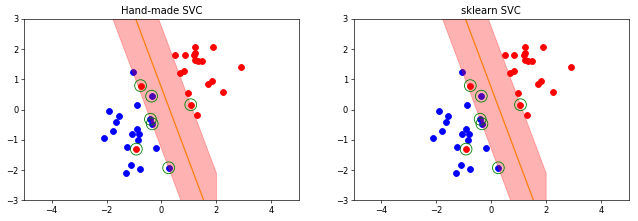

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
import logging
import sys
from sklearn.svm import SVC

# convert warnings to error
warnings.filterwarnings("error")

def getLogger(name):
    logger = logging.getLogger(name)
    if len(logger.handlers) == 0:
        handler = logging.StreamHandler(sys.stdout)
        formatter = logging.Formatter('%(message)s')
        handler.setFormatter(formatter)
        logger.addHandler(handler)
        logger.setLevel(logging.WARNING)
    return logger

logger = getLogger("SMO")

MAX_DEPTH = 20
SPLIT_SECTIONS = 10

S1 = np.array([[0.5, 0.0],
               [0.0, 0.7]])
S2 = np.array([[0.4, 0.0],
               [0.0, 0.7]])
M1 = np.array([1, 1])
M2 = np.array([-1, -1])

kernel = lambda x, y: x@y

def gen_data(n):
    X1 = np.random.multivariate_normal(mean=M1, cov=S1, size=n)
    X2 = np.random.multivariate_normal(mean=M2, cov=S2, size=n)
    X = np.vstack((X1, X2))
    T1 = np.ones(X1.shape[0])
    T2 = np.ones(X2.shape[0])
    T = np.hstack((T1, -T2))
    return X, T

def draw_points(ax, X, T):
    for i in range(len(T)):
        if T[i]==1:
            ax.scatter(X[i][0], X[i][1], s=50, color='red')
        elif T[i]==-1:
            ax.scatter(X[i][0], X[i][1], s=50, color='blue')
    return

class SMO:
    A = None
    X = None
    T = None
    E = None
    b = 0.0
    C = 0.0
    eps = 1e-8
    
    def __init__(self, X, T, C):
        length = len(T)
        self.X = X
        self.T = T
        self.C = C
        self.A = np.full(T.shape, C/2)
        
        ynb = np.zeros(length)
        for i in range(length):
            ynb[i] = (self.A*self.T)@kernel(X, X[i])
        self.b = np.sum(T - ynb)/length
        self.E = ynb + self.b - T
        logger.info("Initialize \n A = {} \n b = {} \n E = {}".format(self.A, self.b, self.E))
        return

    def Psi(self, A2, k11, k22, k12, t1, t2, E1, E2, a1, a2, b, s):
        A1 = a1+s*(a2-A2)
        ret = .5*A1**2*k11 + .5*A2**2*k22 + s*A1*A2*k12 + (t1*(E1-b)-a1*k11-s*a2*k12)*A1 + (t2*(E2-b)-s*a1*k12-a2*k22)*A2
        return ret
    
    def meet_KKT(self, i):
        # from the equation y = A*T @ kernel(X, x) we can find that X will expand the errors
        eps = self.eps*len(self.T)
        y = self.A*self.T @ kernel(self.X, self.X[i]) + self.b
        logger.info("t = {}, y = {}".format(self.T[i], y))
        if abs(self.A[i])<eps and self.T[i]*y>=1:
            return 1
        if self.A[i]>0 and self.A[i]<self.C and abs(self.T[i]*y-1)<eps:
            return 1
        if abs(self.A[i]-self.C)<eps and self.T[i]*y<=1:
            return 1
        return 0
    
    def optimize(self, i, j):
        if i==j:
            return 0
        a1 = self.A[i]
        a2 = self.A[j]
        x1 = self.X[i]
        x2 = self.X[j]
        t1 = self.T[i]
        t2 = self.T[j]
        E1 = self.E[i]
        E2 = self.E[j]
        C  = self.C
        b  = self.b
        s  = t1*t2
        k11 = kernel(x1, x1)
        k22 = kernel(x2, x2)
        k12 = kernel(x1, x2)
        eps = self.eps
        
        if s==-1:
            L = max(0, a2-a1)
            H = min(C, C+a2-a1)
        elif s==1:
            L = max(0, a2+a1-C)
            H = min(C, a2+a1)
        if L==H:
            logger.info("[{},{}] L==H={}".format(i, j, L))
            return 0
        eta = k11 + k22 - 2*k12
        if eta>0:
            a2new = a2 + t2*(E1-E2)/eta
            logger.info("[{},{}] a2new = {} L = {}, H = {}".format(i, j, a2new, L, H))
            logger.info("eta = {}, E = {}".format(eta, self.E))
            a2new = np.clip(a2new, L, H)
        else:
            SL = self.Psi(L, k11, k22, k12, t1, t2, E1, E2, a1, a2, b, s)
            SH = self.Psi(H, k11, k22, k12, t1, t2, E1, E2, a1, a2, b, s)
            if SL < SH:
                a2new = L
            elif SH < SL:
                a2new = H
            else:
                a2new = a2
            logger.info("[{},{}] L or H or a2\n a2new = {}".format(i, j, a2new))
        if abs(a2 - a2new) < eps:
            logger.info('[{},{}] L={}, H={}, a2new={}'.format(i, j, L, H, a2new))
            logger.info('[{},{}] eta {} error {}'.format(i, j, eta, self.E))
            logger.info("[{},{}] a2==a2new = {}".format(i, j, a2new))
            return 0
        a1new = a1+s*(a2-a2new)
        self.A[i] = a1new
        self.A[j] = a2new
        
        n = 0
        b1new = 0
        b2new = 0
        
        if a1new > 0 and a1new < C:
            b1new = -E1 - (a1new-a1)*t1*k11 - (a2new-a2)*t2*k12 + b
            n = 1
            logger.info("[{},{}] a1 new non bound".format(i, j))
        elif a2new > 0 and a2new < C:
            b2new = -E2 - (a1new-a1)*t1*k12 - (a2new-a2)*t2*k22 + b
            n = 1
            logger.info("[{},{}] a2 new non bound".format(i, j))
        else:
            b1new = -E1 - (a1new-a1)*t1*k11 - (a2new-a2)*t2*k12 + b
            b2new = -E2 - (a1new-a1)*t1*k12 - (a2new-a2)*t2*k22 + b
            n = 2
            logger.info("[{},{}] a1 new a2 new bound".format(i, j))
        bnew = (b1new + b2new)/n
        self.b = bnew
        
        for k in range(len(self.X)):
            self.E[k] = self.E[k] + (a1new-a1)*t1*kernel(x1, self.X[k]) + (a2new-a2)*t2*kernel(x2, self.X[k]) + (bnew - b)
        return 1

    def pair_optimize(self, i):
        length = len(self.T)
        j = np.argmax(np.abs(self.E[i] - self.E))
        update = self.optimize(i, j)
        if update==1:
            logger.info("[{},{}] A = {}".format(i, j, self.A))
            return update
        for j in range(length):
            if self.A[j]>0 and self.A[j]<self.C:
                update = self.optimize(i, j)
                if update == 1:
                    logger.info("[{},{}] A = {}".format(i, j, self.A))
                    return update
        for j in range(length):
            if self.A[j]<=0 or self.A[j]>=self.C:
                update = self.optimize(i, j)
                if update == 1:
                    logger.info("[{},{}] A = {}".format(i, j, self.A))
                    return update
        return 0

    def train(self):
        length = len(self.T)
        finished = 0
        initialized = 1
        count = 0
        while finished != 1:
            count += 1
            if count == 10000:
                logger.warning("too long!!!!!")
                break
            if initialized==1 or validation==1:
                initialized = 0
                validation = 0
                idx = -1
                for i in range(length):
                    is_kkt = self.meet_KKT(i)
                    logger.info("[{}] validation meet KKT:{}".format(i, is_kkt))
                    if is_kkt==0:
                        self.pair_optimize(i)
                        idx = i
                if idx == -1:
                    finished = 1
            else:
                while True:
                    # find the multiplier that violate KKT condition
                    idx = -1
                    for i in range(length):
                        if self.A[i]>0 and self.A[i]<self.C:
                            is_kkt = self.meet_KKT(i)
                            logger.info("[{}] non bound update meet KKT:{}".format(i, is_kkt))
                            if is_kkt==0:
                                idx = i
                                self.pair_optimize(i)
                    # if all non-bound multipliers meet the KKT conditions
                    if idx == -1:
                        break
                validation = 1
        return

    def draw(self, ax):
        logger.info("lagrange multiplier {}".format(self.A))
        x = np.array([-2, 2])
        y = np.zeros(x.shape)
        w = (self.A*self.T)@self.X
        logger.info("w = {}, b = {}".format(w, self.b))
        y[0] = (-self.b - w[0] * x[0]) / w[1]
        y[1] = (-self.b - w[0] * x[1]) / w[1]
        ax.plot(x, y, color='C1')
        
        y1 = np.zeros(x.shape)
        y2 = np.zeros(x.shape)
        y1[0] = (1-self.b - w[0] * x[0]) / w[1]
        y1[1] = (1-self.b - w[0] * x[1]) / w[1]
        y2[0] = (-1-self.b - w[0] * x[0]) / w[1]
        y2[1] = (-1-self.b - w[0] * x[1]) / w[1]
        if y1[0] < y2[0]:
            ax.fill_between(x, y1, y2, color='r', alpha=.3)
        else:
            ax.fill_between(x, y2, y1, color='r', alpha=.3)
        
        for i in range(len(self.T)):
            if abs(self.A[i]) > 1e-10:
                ax.scatter(self.X[i][0], self.X[i][1], s=200, edgecolors='green', facecolors='none')
        return

def sklearn_SVC(ax, X, T, C):
    svc = SVC(kernel='linear', C = C)
    svc.fit(X, T)
    n = np.sum(svc.n_support_)
    w = svc.coef_.reshape(-1, 1)
    idxs = svc.support_
    a = svc.dual_coef_.reshape(-1,1)
    b = svc.intercept_ 
    y = svc.predict(X[idxs])
    logger.info("a = {} idxs = {} w = {} b={}".format(a, idxs, w, b))
    
    x = np.array([-2, 2])
    y = np.zeros(x.shape)
    logger.info("w = {}, b = {}".format(w, b))
    y[0] = (-b - w[0] * x[0]) / w[1]
    y[1] = (-b - w[0] * x[1]) / w[1]
    ax.plot(x, y, color='C1')
    
    y1 = np.zeros(x.shape)
    y2 = np.zeros(x.shape)
    y1[0] = (1-b - w[0] * x[0]) / w[1]
    y1[1] = (1-b - w[0] * x[1]) / w[1]
    y2[0] = (-1-b - w[0] * x[0]) / w[1]
    y2[1] = (-1-b - w[0] * x[1]) / w[1]
    if y1[0] < y2[0]:
        ax.fill_between(x, y1, y2, color='r', alpha=.3)
    else:
        ax.fill_between(x, y2, y1, color='r', alpha=.3)
    
    ax.scatter(X[idxs, 0], X[idxs, 1], s=200, edgecolors='green', facecolors='none')
    return

def main():
    fig = plt.figure(figsize=(13,4), dpi=60)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    X, T = gen_data(20)
    xmin = -5
    xmax = 5
    ymin = -3
    ymax = 3
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(ymin, ymax)
    ax1.set_title("Hand-made SVC")
    ax2.set_title("sklearn SVC")
    draw_points(ax1, X, T)
    draw_points(ax2, X, T)

    C = 100
    smo = SMO(X, T, C)
    smo.train()
    smo.draw(ax1)
    
    sklearn_SVC(ax2, X, T, C)
    
    plt.show()
    
if __name__=="__main__":
    main()